# Predictive Analysis of Weather Dataset

In [22]:
#Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [23]:
#Read and store dataset 
weather_dataset = pd.read_csv('weather_dataset.csv')

In [24]:
#Display first 10 rows
weather_dataset.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [25]:
#Check rows in dataset 
rows = weather_dataset.shape[0]
print(f"The dataset has {rows} rows.")

The dataset has 366 rows.


In [26]:
#Check columns in dataset
cols = weather_dataset.shape[1]
print(f"The dataset has {cols} columns.")

The dataset has 22 columns.


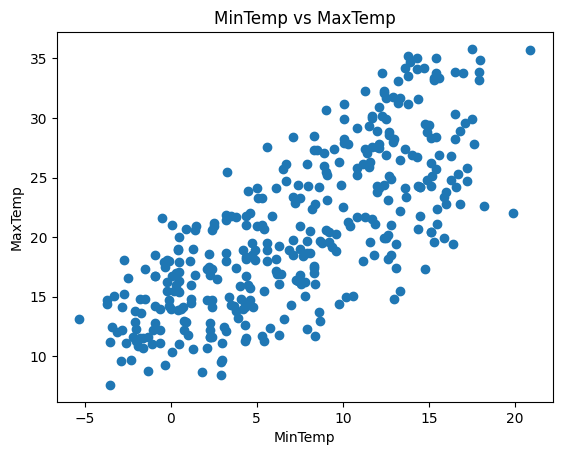

In [27]:
#Plot scatter plot
x_axis = weather_dataset['MinTemp']
y_axis = weather_dataset['MaxTemp']

plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title("MinTemp vs MaxTemp")
plt.scatter(x_axis,y_axis)
plt.show()

In [28]:
#Split features and labels
X = weather_dataset.iloc[:,0].values.reshape(-1,1)
y = weather_dataset.iloc[:,1].values.reshape(-1,1)

In [29]:
#Split data into training samples and testing samples
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=True)  # 80% for training

In [30]:
#Instantiate LinearRegression class
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
#Predictions
y_pred = model.predict(X_test)

In [34]:
 # Create a dictionary with evaluation metrics 
results_reg = { 
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean Square Error': metrics.mean_squared_error(y_test, y_pred)
    }

results_df  = pd.DataFrame([results_reg])

In [35]:
#Print evaluation metrics
results_df

,Mean Absolute Error,Root Mean Squared Error,Mean Square Error
0,3.418761,4.180613,17.477522
